In [1]:
#Using Goole Colab : Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix

import warnings
warnings.filterwarnings('ignore')


## Problem Statement

Determine if the instance is a crater or not a crater. 1=Crater, 0=Not Crater
```
This dataset was generated using HRSC nadir panchromatic image h0905_0000 taken by the Mars Express spacecraft.
The images are located in the Xanthe Terra, centered on Nanedi Vallis and covers mostly Noachian terrain on Mars.
The image had a resolution of 12.5 meters/pixel.
```

In [3]:
#Feature Description
feat_desc=pd.read_excel('/content/drive/MyDrive/Mars Crater Classification/Mars_Crater_Data_Dictionary.xlsx')
feat_desc

,Features,Description
0,attr0,attribute vectors to represent each crater can...
1,attr1,NaN
2,...,NaN
3,attr1088,NaN
4,attr1089,is the instance a crater or not a crater? 1=Cr...


### Load the dataset

In [4]:
# read the dataset and extract the test  and train data separately
df_train=pd.read_csv('/content/drive/MyDrive/Mars Crater Classification/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Mars Crater Classification/test.csv')

#Dropping df_train Id column : train_id
train_id = df_train['Id']
df_train.drop(['Id'], axis=1, inplace=True)


In [5]:
# Data shape
df_train.shape

(5892, 1091)

### Visualize the data

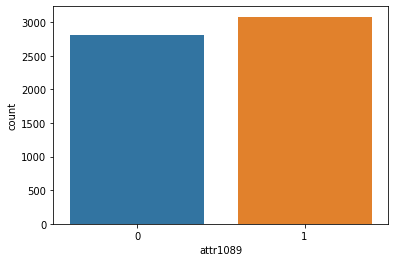

In [6]:
#Target - attr1089 - Crater or NoCrater
sns.countplot(x='attr1089', data=df_train)
#Obs: scarcely imbalanced classes

### Model building

In [7]:
#Splitting training set
y=df_train['attr1089']

X=df_train.iloc[:, 0:1090]

#we split 75% of the data to training set while 25% of the data to validation 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

#X_train, X_valid shape
print(X_train.shape)
print(X_valid.shape)


(4419, 1090)
(1473, 1090)


In [16]:
# Number of trees in random forest
n_estimators = [250,350]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,10]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
print(random_grid)

{'n_estimators': [250, 350], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [17]:
#Initialising Random Forest model
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

y_pred= rf_random.predict(X_valid)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 68.6min finished


In [18]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 350}

In [19]:
#roc_auc score
roc=roc_auc_score(y_valid, y_pred)
print(roc)

0.9189474952276812


### Prediction on the test data


In [20]:
# Code Starts here
#the Id column in a separate variable : test_id
test_id = df_test['Id']
df_test.drop(['Id'], axis=1, inplace=True) 

#Test data shape and columns
print(df_test.shape)
print(df_test.columns)


# Code ends here

(1473, 1090)
Index(['Unnamed: 0', 'attr0', 'attr1', 'attr2', 'attr3', 'attr4', 'attr5',
       'attr6', 'attr7', 'attr8',
       ...
       'attr1079', 'attr1080', 'attr1081', 'attr1082', 'attr1083', 'attr1084',
       'attr1085', 'attr1086', 'attr1087', 'attr1088'],
      dtype='object', length=1090)


In [23]:
#Features selected from test data
X_test=df_test.iloc[:, 0:1090]

#make prediction : attr1089
ytest_pred=rf_random.predict(X_test)

#Making df for submission
subm=pd.DataFrame({"Id": test_id, "attr1089": ytest_pred})
print(subm.head())

     Id  attr1089
0  3531         0
1  3916         0
2  3065         1
3  3465         1
4  5619         0


In [24]:
# To CSV for submission
#subm.to_csv('Mars_Crater.csv',index=False)

#from google.colab import files
#files.download('Mars_Crater.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>